# Opioid Death Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st
from scipy.stats import linregress
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [2]:
#Create overall dataframe
wide_data = "Wide_Master.csv"
wide_master = pd.read_csv(wide_data, usecols = ['State','Year','Total','Income','Unemployment','GDP Total','Population'])
wide_master = wide_master.rename(columns={
    "Total":"Death",
    "GDP Total": "GDP"})
wide_master['Deaths Per Capita'] = (wide_master['Death']/wide_master['Population'])*100
wide_master

,State,Year,Death,Population,Income,Unemployment,GDP,Deaths Per Capita
0,Alabama,2011,10.0,186717.0,67770.0,9.0,5016735.0,0.005356
1,Alabama,2011,NaN,80536.0,51374.0,9.5,2298846.0,NaN
2,Alabama,2011,NaN,104303.0,51330.0,10.0,2801621.0,NaN
3,Alabama,2011,39.0,658931.0,66409.0,9.3,39515681.0,0.005919
4,Alabama,2011,14.0,340111.0,76342.0,8.3,19512201.0,0.004116
...,...,...,...,...,...,...,...,...
5407,Wisconsin,2017,18.0,135101.0,89470.0,2.8,5636773.0,0.013323
5408,Wisconsin,2017,52.0,400621.0,105275.0,2.9,28028503.0,0.012980
5409,Wisconsin,2017,16.0,170414.0,71572.0,3.0,9274302.0,0.009389
5410,Wyoming,2017,NaN,39803.0,70101.0,5.5,1595939.0,NaN


In [3]:
#Cleaning out NaN data
wide_master2 = wide_master.dropna(how='any')
wide_master2

,State,Year,Death,Population,Income,Unemployment,GDP,Deaths Per Capita
0,Alabama,2011,10.0,186717.0,67770.0,9.0,5016735.0,0.005356
3,Alabama,2011,39.0,658931.0,66409.0,9.3,39515681.0,0.005919
4,Alabama,2011,14.0,340111.0,76342.0,8.3,19512201.0,0.004116
5,Alabama,2011,12.0,412577.0,56992.0,10.8,17901892.0,0.002909
6,Alabama,2011,10.0,197936.0,88876.0,6.2,8268481.0,0.005052
...,...,...,...,...,...,...,...,...
5403,Wisconsin,2017,29.0,162309.0,66222.0,3.7,7013004.0,0.017867
5405,Wisconsin,2017,15.0,115344.0,69652.0,2.8,6700198.0,0.013005
5407,Wisconsin,2017,18.0,135101.0,89470.0,2.8,5636773.0,0.013323
5408,Wisconsin,2017,52.0,400621.0,105275.0,2.9,28028503.0,0.012980


# Factor: States

In [4]:
#Summary statistics of mean death rate by state
#Added in Death Per Capita column to compare states by mean rates of death per population
mean_total = wide_master2.groupby("State")["Deaths Per Capita"].mean()
median_total = wide_master2.groupby("State")["Deaths Per Capita"].median()
stdv_total = wide_master2.groupby("State")["Deaths Per Capita"].std()
deathsummary_df = pd.DataFrame({"Mean Deaths Per Capita by State": mean_total, 
                                "Median Deaths Per Capita by State": median_total,  
                                "Standard Deviation Deaths Per Capita by State": stdv_total,
                          })
deathsummary_df.head()

,Mean Deaths Per Capita by State,Median Deaths Per Capita by State,Standard Deviation Deaths Per Capita by State
State,,,
Alabama,0.009386,0.007011,0.006578
Alaska,0.017044,0.018801,0.006409
Arizona,0.010460,0.010023,0.004148
Arkansas,0.008604,0.007476,0.003984
California,0.007028,0.005351,0.005713


In [5]:
#Create dataframe of mean death rate by state
meandeath_df = pd.DataFrame({"Mean Death by State": mean_total
                            })
meandeath_df.style.format("{:.2%}")
meandeath_df.head()

,Mean Death by State
State,
Alabama,0.009386
Alaska,0.017044
Arizona,0.010460
Arkansas,0.008604
California,0.007028


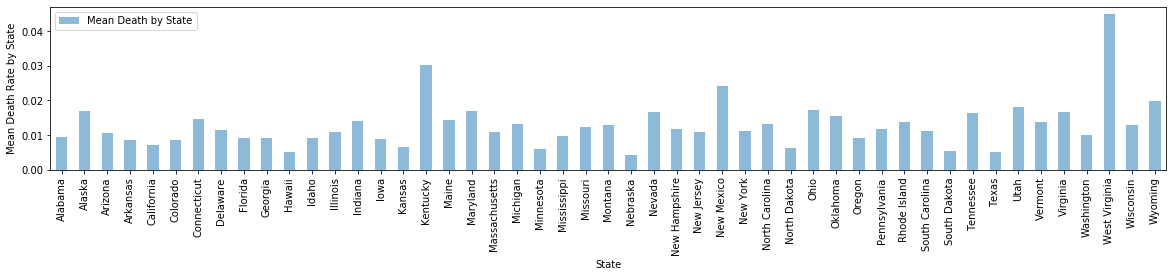

<Figure size 432x288 with 0 Axes>

In [7]:
#Bar graph of mean death rate by state
chart = meandeath_df.plot(kind='bar', alpha=0.5, align="center",figsize=(20,3))
chart.set_xlabel("State")
chart.set_ylabel("Mean Death Rate by State")

plt.show()
plt.tight_layout()

In [8]:
#Create dataframe of income stats by state 
mean_income = wide_master2.groupby("State")["Income"].mean()
median_income = wide_master2.groupby("State")["Income"].median()
stdv_income = wide_master2.groupby("State")["Income"].std()
incomesummary_df = pd.DataFrame({"Mean Income by State": mean_income, 
                                 "Median Income Rate by State": median_income, 
                                 "Standard Deviation Income by State": stdv_income, 
                          })
incomesummary_df.head()

,Mean Income by State,Median Income Rate by State,Standard Deviation Income by State
State,,,
Alabama,67732.000000,66605.0,11724.634117
Alaska,82894.000000,80661.0,6201.715327
Arizona,62314.026316,60771.0,7537.849426
Arkansas,65307.083333,65940.0,8940.788239
California,82735.736041,78494.0,22939.029025


In [9]:
meanincome_df = pd.DataFrame({"Mean Income by State": mean_income
                            })
meanincome_df.head()

,Mean Income by State
State,
Alabama,67732.000000
Alaska,82894.000000
Arizona,62314.026316
Arkansas,65307.083333
California,82735.736041


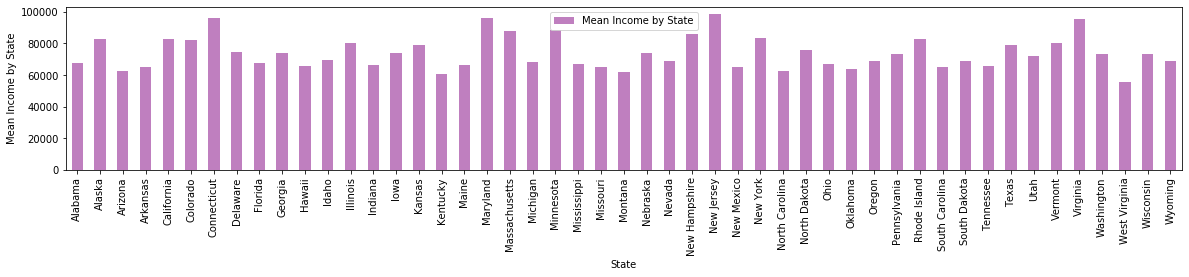

<Figure size 432x288 with 0 Axes>

In [10]:
#Bar graph of mean income by state
chart = meanincome_df.plot(kind='bar',color='purple', alpha=0.5, align="center",figsize=(20,3))
chart.set_xlabel("State")
chart.set_ylabel("Mean Income by State")


plt.show()
plt.tight_layout()

In [11]:
#Create state dataframe for choropleth map
state_data_grp = wide_master2.groupby("State")["Deaths Per Capita"].mean()
statedata_df = pd.DataFrame({"Mean Death by State": state_data_grp})
statedata_df = statedata_df.reset_index()
statedata_df.head()

,State,Mean Death by State
0,Alabama,0.009386
1,Alaska,0.017044
2,Arizona,0.010460
3,Arkansas,0.008604
4,California,0.007028


In [13]:
#Mean Death rate by state choropleth map

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=statedata_df,
    columns=['State', 'Mean Death by State'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Opioid Death Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)
m

#Originally confused that LA was so dark but not showing up previous visualizations by state 
    #and realized that it was "grayed out" due to incomplete data

In [14]:
# Top 5 states with the highest average death rate per capita from 2011 to 2017 
state_death = wide_master2.groupby("State").agg({
    "Deaths Per Capita": "mean",
}).reset_index()

state_death.sort_values(by="Deaths Per Capita",ascending=False).head(5)

,State,Deaths Per Capita
46,West Virginia,0.044854
16,Kentucky,0.030316
29,New Mexico,0.024269
48,Wyoming,0.019768
42,Utah,0.018185


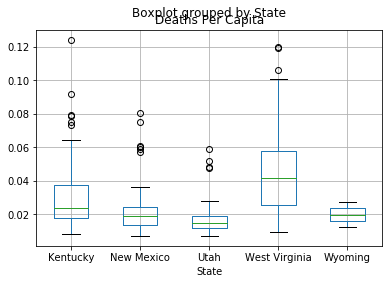

In [15]:
# Boxplot of the those top 5 states 
top5states = wide_master2.loc[
    (wide_master2["State"] == "West Virginia") | 
    (wide_master2["State"] == "Kentucky") | 
    (wide_master2["State"] == "New Mexico") | 
    (wide_master2["State"] == "Wyoming") | 
    (wide_master2["State"] == "Utah") 
    ]
top5states.boxplot("Deaths Per Capita", by="State")

In [16]:
# Ordinary Least Squares (OLS) model analyzing the TOP 5 states
# States vs Year: statistically significant, p-value is less than 0.05. 
model_top5 = ols('Death ~ State', data=top5states).fit()
anova_table_top5 = sm.stats.anova_lm(model_top5, typ=2)
anova_table_top5

,sum_sq,df,F,PR(>F)
State,32187.721726,4.0,8.223861,0.000003
Residual,287674.786635,294.0,NaN,NaN


In [17]:
# Ordinary Least Squares (OLS) model analyzing all the states
# States vs Year: statistically significant, p-value is less than 0.05. 
model_all = ols('Death ~ State', data=wide_master2).fit()
anova_table_all = sm.stats.anova_lm(model_all, typ=2)
anova_table_all

,sum_sq,df,F,PR(>F)
State,9.424557e+05,48.0,7.482929,4.111790e-46
Residual,8.317779e+06,3170.0,NaN,NaN


# Factor: Year

In [18]:
# Total number of death by year 
year_death = wide_master2.groupby("Year").agg({
    "Death": "sum"
}).reset_index()
year_death

,Year,Death
0,2011,14029.0
1,2012,14276.0
2,2013,15997.0
3,2014,18544.0
4,2015,21007.0
5,2016,24659.0
6,2017,24336.0


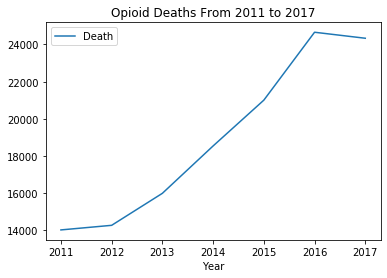

In [19]:
# Line plot of death by year
year_death.plot(kind="line", x="Year", y="Death", title="Opioid Deaths From 2011 to 2017")


In [20]:
# Death vs Year: statistically significant, p-value is less than 0.05. 
year_vs_death = smf.ols('Death ~ Year', data=wide_master2).fit()
print(year_vs_death.summary())

                            OLS Regression Results                            
Dep. Variable:                  Death   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     17.93
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           2.35e-05
Time:                        21:07:06   Log-Likelihood:                -17377.
No. Observations:                3219   AIC:                         3.476e+04
Df Residuals:                    3217   BIC:                         3.477e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4014.5620    957.700     -4.192      0.0

# Factor: GDP

In [21]:
#Create dataframe for GDP Total
wide_master3 = pd.read_csv(wide_data, usecols = ['State','GDP Total'])
wide_master3 = wide_master3.dropna(how='any')
wide_master3

,State,GDP Total
0,Alabama,5016735.0
1,Alabama,2298846.0
2,Alabama,2801621.0
3,Alabama,39515681.0
4,Alabama,19512201.0
...,...,...
5407,Wisconsin,5636773.0
5408,Wisconsin,28028503.0
5409,Wisconsin,9274302.0
5410,Wyoming,1595939.0


In [22]:
mean_GDP = wide_master3.groupby("State")["GDP Total"].mean()
GDPsummary_df = pd.DataFrame({"Mean GDP by State": mean_GDP
                             })
GDPsummary_df.head()

,Mean GDP by State
State,
Alabama,1.205206e+07
Alaska,4.190802e+06
Arizona,4.311028e+07
Arkansas,8.413269e+06
California,6.571603e+07


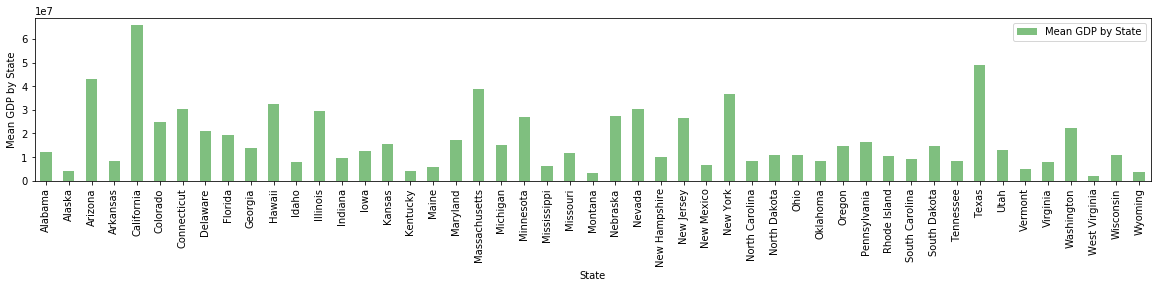

<Figure size 432x288 with 0 Axes>

In [23]:
#Bar graph of GDP by state
chart = GDPsummary_df.plot(kind='bar',color='green', alpha=0.5, align="center",figsize=(20,3))
chart.set_xlabel("State")
chart.set_ylabel("Mean GDP by State")

plt.show()
plt.tight_layout()

In [24]:
# Death vs GDP: statistically significant, p-value is less than 0.05. 
gdp_vs_death = smf.ols('Death ~ GDP', data=wide_master2).fit()
print(gdp_vs_death.summary())

                            OLS Regression Results                            
Dep. Variable:                  Death   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     2161.
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:07:28   Log-Likelihood:                -16559.
No. Observations:                3219   AIC:                         3.312e+04
Df Residuals:                    3217   BIC:                         3.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.0617      0.810     30.930      0.0

# Factor: Population

In [25]:
# Death vs Population: statistically significant, p-value is less than 0.05. 
population_vs_death = smf.ols('Death ~ Population', data=wide_master).fit()
print(population_vs_death.summary())

                            OLS Regression Results                            
Dep. Variable:                  Death   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     3555.
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:07:31   Log-Likelihood:                -17461.
No. Observations:                3468   AIC:                         3.493e+04
Df Residuals:                    3466   BIC:                         3.494e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2553      0.748     23.061      0.0

In [26]:
#Create dataframe of population and grad degrees 
wide_master4 = pd.read_csv(wide_data, usecols = ['State','Population','Bachelor_Degree', 'Grad_Degree',
                                                 'HS_Grad','Less_Than_HS','Associates_Degree'])
wide_master4 = wide_master4.dropna(how='any')
wide_master4

,State,Population,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree
0,Alabama,186717.0,22946.0,10923.0,36271.0,15094.0,39216.0
1,Alabama,80536.0,4807.0,2940.0,17883.0,12788.0,16286.0
2,Alabama,104303.0,6642.0,4270.0,22939.0,13064.0,24325.0
3,Alabama,658931.0,78798.0,48016.0,121313.0,58142.0,131726.0
4,Alabama,340111.0,50973.0,30157.0,48925.0,24067.0,62801.0
...,...,...,...,...,...,...,...
5407,Wisconsin,135101.0,20316.0,7526.0,28297.0,5231.0,32364.0
5408,Wisconsin,400621.0,78511.0,40693.0,65576.0,11104.0,81873.0
5409,Wisconsin,170414.0,22213.0,8838.0,39008.0,8679.0,34896.0
5410,Wyoming,39803.0,4158.0,2073.0,8497.0,2381.0,9672.0


In [30]:
sum_population = wide_master4.groupby("State")["Population"].sum()
sum_Bachelor = wide_master4.groupby("State")["Bachelor_Degree"].sum()
sum_Grad = wide_master4.groupby("State")["Grad_Degree"].sum()
sum_HS = wide_master4.groupby("State")["HS_Grad"].sum()
sum_LessHS = wide_master4.groupby("State")["Less_Than_HS"].sum()
sum_Associates = wide_master4.groupby("State")["Associates_Degree"].sum()

degreesummary_df = pd.DataFrame({"Total of Population by State": sum_population,
                                 "Total of Graduate Degree by State": sum_Grad, 
                                 "Total of Bachelor Degree by State": sum_Bachelor, 
                                 "Total of Associates Degree by State": sum_Associates,
                                 "Total of High School Degree by State": sum_HS, 
                                 "Total of Less Than HS Degree by State": sum_LessHS,
                              
                          })
degreesummary_df.head()

,Total of Population by State,Total of Graduate Degree by State,Total of Bachelor Degree by State,Total of Associates Degree by State,Total of High School Degree by State,Total of Less Than HS Degree by State
State,,,,,,
Alabama,16586563.0,1133219.0,1961518.0,3335584.0,3083234.0,1421893.0
Alaska,1102195.0,72938.0,119500.0,265515.0,188016.0,45690.0
Arizona,42349012.0,2827306.0,4846476.0,9271841.0,6524927.0,3624126.0
Arkansas,7268049.0,444200.0,829969.0,1427884.0,1448479.0,603212.0
California,261700140.0,19586651.0,33410142.0,49386560.0,34623853.0,30954160.0


In [28]:
PieData = degreesummary_df.loc[['West Virginia','Kentucky','Texas','California'],:]
PieData

,Total of Population by State,Total of Graduate Degree by State,Total of Bachelor Degree by State,Total of Associates Degree by State,Total of High School Degree by State,Total of Less Than HS Degree by State
State,,,,,,
West Virginia,9587769.0,533898.0,822561.0,1721226.0,2598647.0,1006570.0
Kentucky,18189060.0,1303593.0,1912801.0,3511715.0,3668749.0,1648081.0
Texas,138094564.0,8658632.0,16584118.0,23806440.0,19141930.0,14896941.0
California,261700140.0,19586651.0,33410142.0,49386560.0,34623853.0,30954160.0


In [29]:
percent_Bachelor = PieData["Total of Bachelor Degree by State"]/PieData["Total of Population by State"]
percent_Grad = PieData["Total of Graduate Degree by State"]/PieData["Total of Population by State"]
percent_HS = PieData["Total of High School Degree by State"]/PieData["Total of Population by State"]
percent_LessHS = PieData["Total of Less Than HS Degree by State"]/PieData["Total of Population by State"]
percent_Associates = PieData["Total of Associates Degree by State"]/PieData["Total of Population by State"]
percent_other = 1-percent_Bachelor - percent_Grad - percent_HS - percent_LessHS - percent_Associates
percentdegree_df = pd.DataFrame({"Percentage of Graduate Degree by State": percent_Grad, 
                                 "Percentage of Bachelor Degree by State": percent_Bachelor, 
                                 "Percentage of Associates Degree by State": percent_Associates,
                                 "Percentage of High School Degree by State": percent_HS, 
                                 "Percentage of Less Than HS Degree by State": percent_LessHS,
                                 "Percentage of Others": percent_other
                          })
percentdegree_df.style.format("{:.2%}")


,Percentage of Graduate Degree by State,Percentage of Bachelor Degree by State,Percentage of Associates Degree by State,Percentage of High School Degree by State,Percentage of Less Than HS Degree by State,Percentage of Others
State,,,,,,
West Virginia,5.57%,8.58%,17.95%,27.10%,10.50%,30.30%
Kentucky,7.17%,10.52%,19.31%,20.17%,9.06%,33.78%
Texas,6.27%,12.01%,17.24%,13.86%,10.79%,39.83%
California,7.48%,12.77%,18.87%,13.23%,11.83%,35.82%


In [31]:
#Pie charts of grad degrees of West Viginia, Kentucky, Texas, & California
pie_wv = percentdegree_df.loc['West Virginia',:]
wv_df = pd.DataFrame(pie_wv)
pie_ken = percentdegree_df.loc['Kentucky',:]
ken_df = pd.DataFrame(pie_ken)
pie_tx = percentdegree_df.loc['Texas',:]
tx_df = pd.DataFrame(pie_tx)
pie_cal = percentdegree_df.loc['California',:]
cal_df = pd.DataFrame(pie_cal)

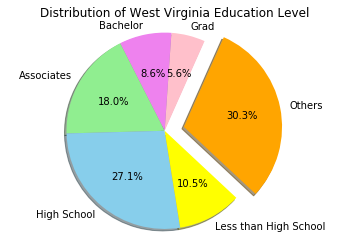

In [33]:
explode = (0,0,0,0,0,0.2)
colors = ["pink", "violet","lightgreen","skyblue","yellow","orange"]
plt.pie(wv_df,labels=["Grad","Bachelor","Associates","High School","Less than High School","Others"],autopct="%1.1f%%",explode=explode,colors=colors,shadow=True, startangle=66)
plt.axis("equal")
plt.title("Distribution of West Virginia Education Level")
plt.show()

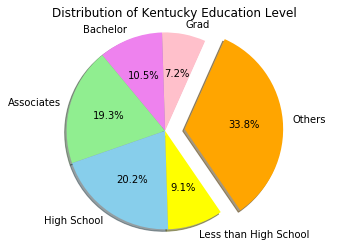

In [34]:
explode = (0,0,0,0,0,0.2)
colors = ["pink", "violet","lightgreen","skyblue","yellow","orange"]
plt.pie(ken_df,labels=["Grad","Bachelor","Associates","High School","Less than High School","Others"],autopct="%1.1f%%",explode=explode,colors=colors,shadow=True, startangle=66)
plt.axis("equal")
plt.title("Distribution of Kentucky Education Level")
plt.show()

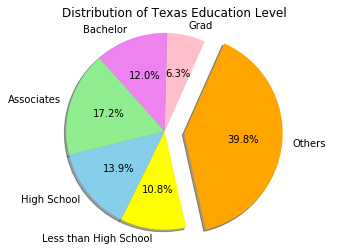

In [35]:
explode = (0,0,0,0,0,0.2)
colors = ["pink", "violet","lightgreen","skyblue","yellow","orange"]
plt.pie(tx_df,labels=["Grad","Bachelor","Associates","High School","Less than High School","Others"],autopct="%1.1f%%",explode=explode,colors=colors,shadow=True, startangle=66)
plt.axis("equal")
plt.title("Distribution of Texas Education Level")
plt.show()

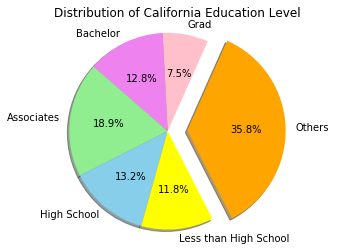

In [36]:
explode = (0,0,0,0,0,0.2)
colors = ["pink", "violet","lightgreen","skyblue","yellow","orange"]
plt.pie(cal_df,labels=["Grad","Bachelor","Associates","High School","Less than High School","Others"],autopct="%1.1f%%",explode=explode,colors=colors,shadow=True, startangle=66)
plt.axis("equal")
plt.title("Distribution of California Education Level")
plt.show()

# Factor: Income

In [37]:
#Creating bins for income
wide_master2["Income"].max()

162292.0

In [38]:
wide_master2["Income"].min()

31964.0

In [39]:
income_bins = [0, 35000, 75000, 120000, 165000]
group_names = ["<$35K", "$35K-$75K", "$75K-120K", "$115K-165K"]

In [40]:
pd.cut(wide_master2["Income"], income_bins, labels=group_names).head()

0    $35K-$75K
3    $35K-$75K
4    $75K-120K
5    $35K-$75K
6    $75K-120K
Name: Income, dtype: category
Categories (4, object): [<$35K < $35K-$75K < $75K-120K < $115K-165K]

In [41]:
#Place the data series into a new column inside of the DataFrame
wide_master2["Income Ranges"] = pd.cut(wide_master2["Income"], income_bins, labels=group_names)
wide_master2.head()

,State,Year,Death,Population,Income,Unemployment,GDP,Deaths Per Capita,Income Ranges
0,Alabama,2011,10.0,186717.0,67770.0,9.0,5016735.0,0.005356,$35K-$75K
3,Alabama,2011,39.0,658931.0,66409.0,9.3,39515681.0,0.005919,$35K-$75K
4,Alabama,2011,14.0,340111.0,76342.0,8.3,19512201.0,0.004116,$75K-120K
5,Alabama,2011,12.0,412577.0,56992.0,10.8,17901892.0,0.002909,$35K-$75K
6,Alabama,2011,10.0,197936.0,88876.0,6.2,8268481.0,0.005052,$75K-120K


In [42]:
# Create a GroupBy object based upon "Income Ranges"
income_death_mean = wide_master2.groupby("Income Ranges")["Deaths Per Capita"].mean()
income_death_median = wide_master2.groupby("Income Ranges")["Deaths Per Capita"].median()
income_death_sd = wide_master2.groupby("Income Ranges")["Deaths Per Capita"].std()

#Put into dataframe
income_deathsummary_df = pd.DataFrame({"Mean Death Rate by Income": income_death_mean, 
                                       "Median Death Rate by Income": income_death_median,  
                                       "Standard Deviation Death Rate by Income": income_death_sd, 
                          })
income_deathsummary_df

,Mean Death Rate by Income,Median Death Rate by Income,Standard Deviation Death Rate by Income
Income Ranges,,,
<$35K,0.082850,0.067063,0.036426
$35K-$75K,0.015639,0.012401,0.012628
$75K-120K,0.010322,0.008693,0.006477
$115K-165K,0.006745,0.006369,0.003449


In [43]:
#Create dataframe of mean death rate by income ranges
income_death_mean_df = pd.DataFrame({"Mean Death Rate by Income": income_death_mean
                            })
income_death_mean_df.head()

,Mean Death Rate by Income
Income Ranges,
<$35K,0.082850
$35K-$75K,0.015639
$75K-120K,0.010322
$115K-165K,0.006745


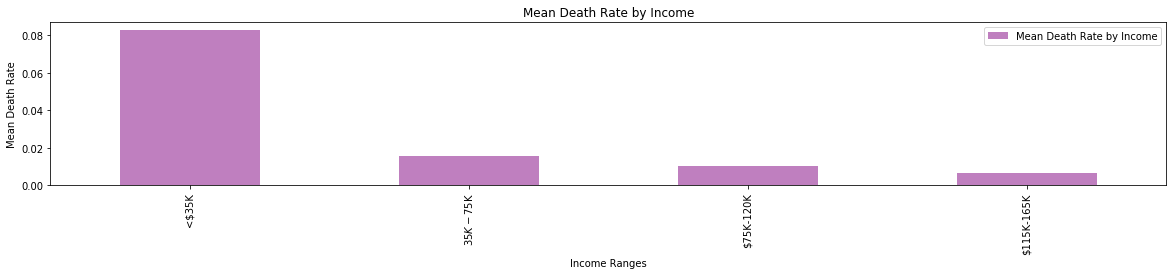

<Figure size 432x288 with 0 Axes>

In [45]:
#Bar chart of mean death rate by income rnages
chart = income_death_mean_df.plot(kind='bar',color='purple', alpha=0.5, align="center",figsize=(20,3))
chart.set_xlabel("Income Ranges")
chart.set_ylabel("Mean Death Rate")
plt.title("Mean Death Rate by Income")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Mean Death Rate')

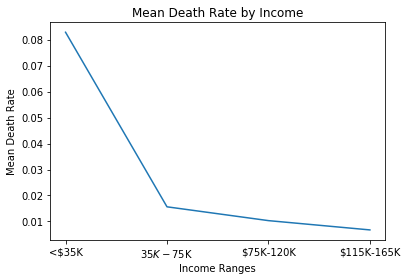

In [46]:
# Generate a line plot of mean death rate by income ranges
y_axis = income_death_mean_df["Mean Death Rate by Income"]
x_axis = income_death_mean_df.index
plt.plot(x_axis, y_axis)
plt.title("Mean Death Rate by Income")
plt.xlabel("Income Ranges")
plt.ylabel("Mean Death Rate")

In [47]:
#Create dataframe of mean death rate by income
incomemean_total = wide_master2.groupby("Income")["Deaths Per Capita"].mean()
deathincomesummary_df = pd.DataFrame({"Mean Death Rate by Income": incomemean_total
                          })
deathincomesummary_df.head()

,Mean Death Rate by Income
Income,
31964.0,0.119656
32781.0,0.047555
34034.0,0.124309
34204.0,0.055669
34504.0,0.067063


The r-squared is: -0.3669957140120881


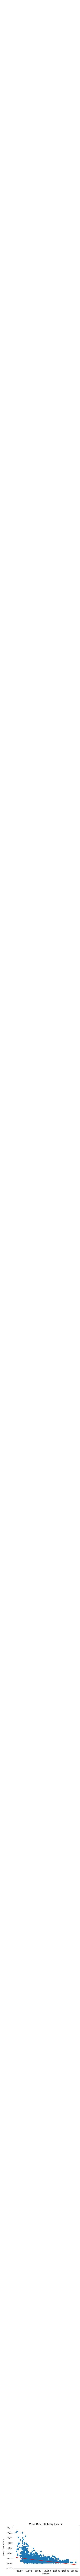

<Figure size 432x288 with 0 Axes>

In [48]:
# Calculate the correlation coefficient and linear regression model of mean death rate by income
x_values = deathincomesummary_df.index
y_values = deathincomesummary_df["Mean Death Rate by Income"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Income")
plt.ylabel("Mean Death Rate")
plt.title("Mean Death Rate by Income")
print(f"The r-squared is: {rvalue}")
plt.show()

In [49]:
# Death vs Income: statistically significant, p-value is less than 0.05. 
income_vs_death = smf.ols('Death ~ Income', data=wide_master).fit()
print(income_vs_death.summary())

                            OLS Regression Results                            
Dep. Variable:                  Death   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     103.5
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           5.61e-24
Time:                        21:13:08   Log-Likelihood:                -18698.
No. Observations:                3480   AIC:                         3.740e+04
Df Residuals:                    3478   BIC:                         3.741e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2833      3.548      1.771      0.0

# Factor: Unemployment 

In [50]:
#Summary stats of unemployment by mean death rate 
mean_total = wide_master2.groupby("Unemployment")["Deaths Per Capita"].mean()
median_total = wide_master2.groupby("Unemployment")["Deaths Per Capita"].median()
stdv_total = wide_master2.groupby("Unemployment")["Deaths Per Capita"].std()
unemployment_deathsummary_df = pd.DataFrame({"Mean Death Rate by Unemployment": mean_total, 
                                             "Median Death Rate by Unemployment": median_total,  
                                             "Standard Deviation Death Rate by Unemployment": stdv_total, 
                          })
unemployment_deathsummary_df.head()

,Mean Death Rate by Unemployment,Median Death Rate by Unemployment,Standard Deviation Death Rate by Unemployment
Unemployment,,,
2.2,0.009297,0.009297,0.004271
2.3,0.006977,0.006977,NaN
2.4,0.009503,0.009503,0.003961
2.5,0.009392,0.008742,0.003940
2.6,0.006321,0.006731,0.002171


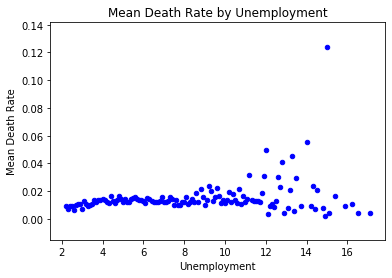

In [51]:
# Generate a scatter plot of mean death rate by unemployment
unemploymentdeath_scatter = pd.DataFrame({
    "x": unemployment_deathsummary_df.index,
    "y": unemployment_deathsummary_df["Mean Death Rate by Unemployment"]
})
unemploymentdeath_scatter.head()

fig, ax = plt.subplots()

unemploymentdeath_scatter.plot.scatter(x="x", y="y", ax=ax, color="blue")
ax.set(title="Mean Death Rate by Unemployment", xlabel="Unemployment", ylabel="Mean Death Rate")

Text(0, 0.5, 'Mean Death Rate')

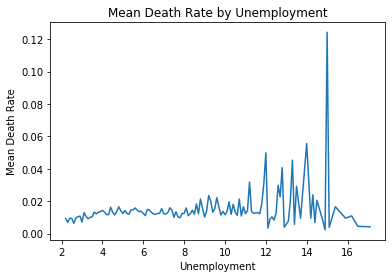

In [52]:
#Generate a line plot of mean death rate by unemployment
y_axis = unemployment_deathsummary_df["Mean Death Rate by Unemployment"]
x_axis = unemployment_deathsummary_df.index
plt.plot(x_axis, y_axis)
plt.title("Mean Death Rate by Unemployment")
plt.xlabel("Unemployment")
plt.ylabel("Mean Death Rate")

The r-squared is: 0.24339843184589507


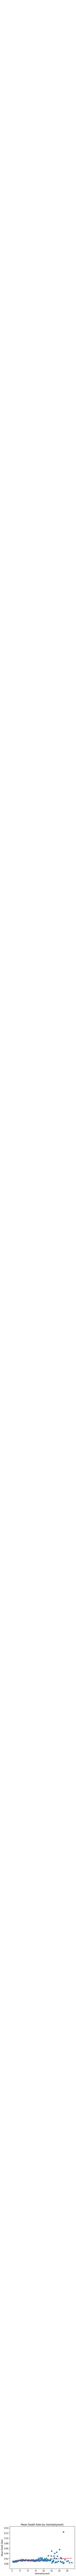

In [53]:
#Calculate the correlation coefficient and linear regression model
x_values = unemployment_deathsummary_df.index
y_values = unemployment_deathsummary_df["Mean Death Rate by Unemployment"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Unemployment")
plt.ylabel("Mean Death Rate")
plt.title("Mean Death Rate by Unemployment")
print(f"The r-squared is: {rvalue}")
plt.show()

In [54]:
# Death vs Unemployment: statistically significant, p-value is less than 0.05. 
unemployment_vs_death = smf.ols('Death ~ Unemployment', data=wide_master).fit()
print(unemployment_vs_death.summary())

                            OLS Regression Results                            
Dep. Variable:                  Death   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     13.24
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           0.000278
Time:                        21:14:09   Log-Likelihood:                -18290.
No. Observations:                3399   AIC:                         3.658e+04
Df Residuals:                    3397   BIC:                         3.660e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       50.0245      2.670     18.737   

prescription_df = pd.read_csv("prescriber-info.csv")

# Prescriber Data

In [56]:
#Create prescriber dataframe
prescription_df = pd.read_csv("prescriber-info.csv")

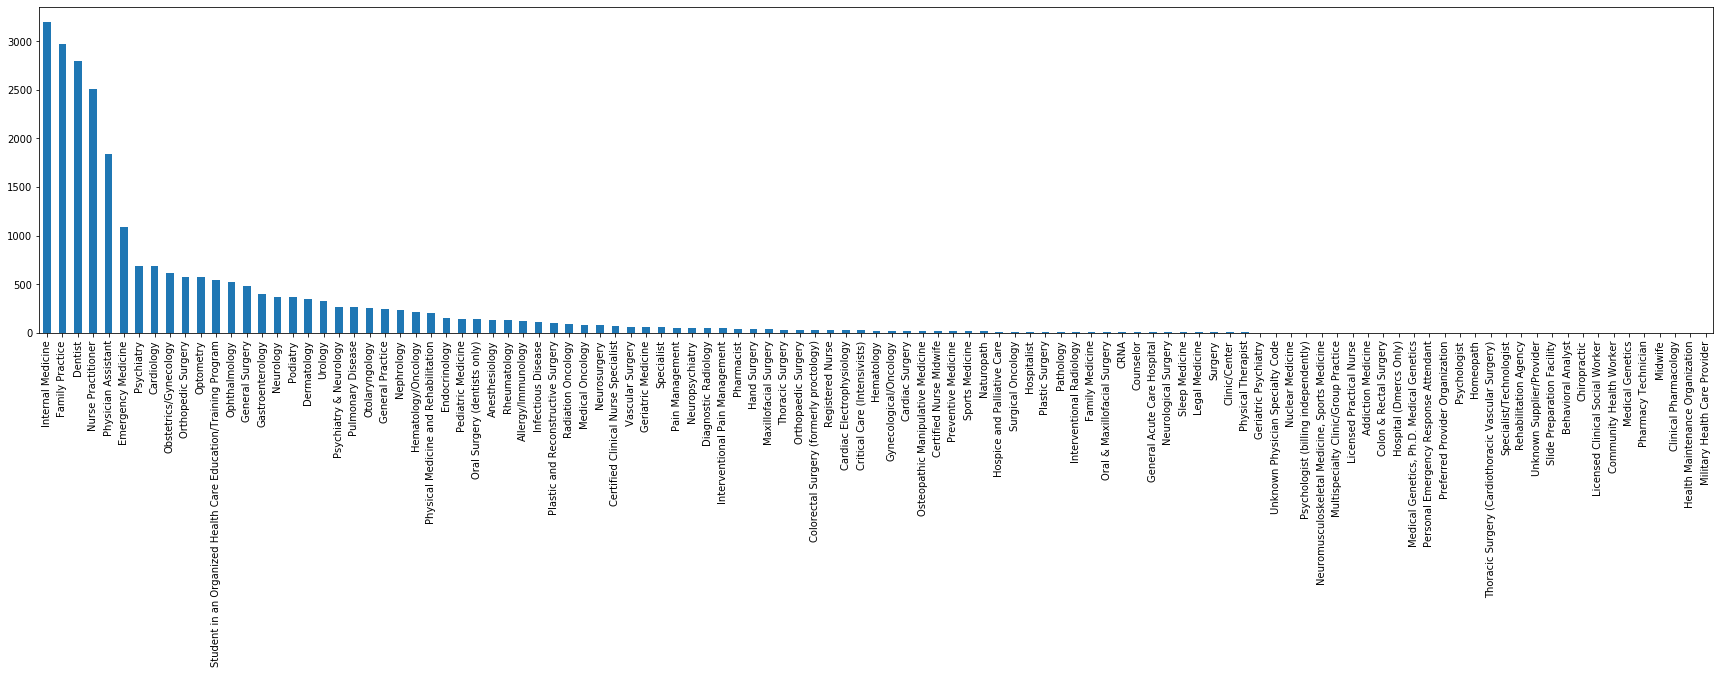

In [57]:
#Prescriber bar graph
prescription_df["Specialty"].value_counts().plot(kind='bar',figsize=(30, 6))

In [58]:
prescription_df["Specialty"].value_counts()

Internal Medicine                  3194
Family Practice                    2975
Dentist                            2800
Nurse Practitioner                 2512
Physician Assistant                1839
                                   ... 
Pharmacy Technician                   1
Midwife                               1
Clinical Pharmacology                 1
Health Maintenance Organization       1
Military Health Care Provider         1
Name: Specialty, Length: 109, dtype: int64

In [59]:
#Reduce number of visible specialties
series_counts = prescription_df["Specialty"].value_counts()

In [60]:
Specialty=[]

for i in series_counts.items():
    if i[1]>=100:
        Specialty.append(i[0])

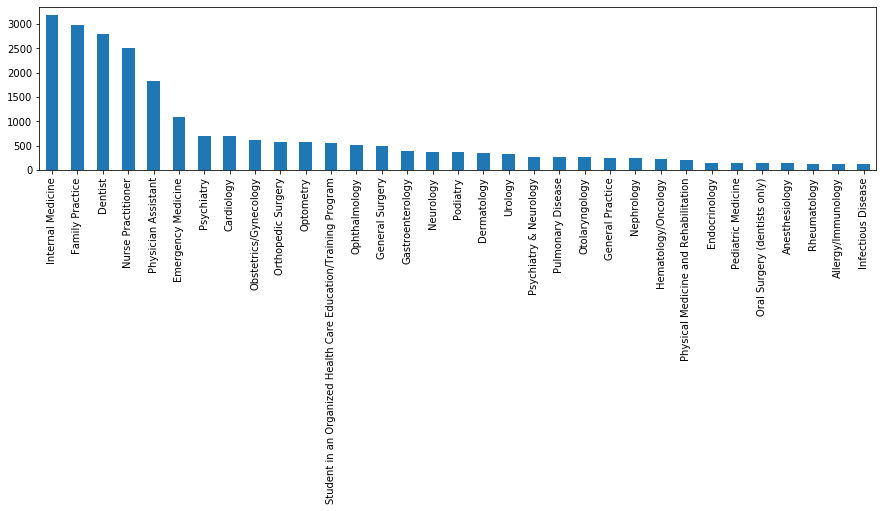

In [61]:
specialty_df=prescription_df[prescription_df["Specialty"].isin(Specialty)]["Specialty"]
specialty_df.value_counts().plot(kind='bar',figsize=(15, 3))